In [1]:
import pandas as pd
import os

# Folder where the CSVs are stored
data_folder = "../data"

# Create an empty list to store all DataFrames
df_list = []

# Loop through all CSV files in the folder
for file in os.listdir(data_folder):
    if file.endswith(".csv"):
        file_path = os.path.join(data_folder, file)
        df = pd.read_csv(file_path)
        
        # Extract year from filename, assuming the year is in the filename
        try:
            year = int("".join(filter(str.isdigit, file)))
        except ValueError:
            print(f"Could not extract year from {file}")
            continue
        
        df['year'] = year
        df_list.append(df)

# Combine all the DataFrames
combined_df = pd.concat(df_list, ignore_index=True)

# Confirm and convert to int if needed
combined_df['year'] = pd.to_numeric(combined_df['year'], errors='coerce')

# Drop rows where year couldn't be parsed
combined_df = combined_df.dropna(subset=['year'])
combined_df['year'] = combined_df['year'].astype(int)

# Check result
print(combined_df.head())

Could not extract year from combined.csv
       country                 region  happiness_score  gdp_per_capita  \
0  Switzerland         Western Europe            7.587         1.39651   
1      Iceland         Western Europe            7.561         1.30232   
2      Denmark         Western Europe            7.527         1.32548   
3       Norway         Western Europe            7.522         1.45900   
4       Canada  North America and ANZ            7.427         1.32629   

   social_support  healthy_life_expectancy  freedom_to_make_life_choices  \
0         1.34951                  0.94143                       0.66557   
1         1.40223                  0.94784                       0.62877   
2         1.36058                  0.87464                       0.64938   
3         1.33095                  0.88521                       0.66973   
4         1.32261                  0.90563                       0.63297   

   generosity  perceptions_of_corruption  year  
0     0.

In [2]:
print(combined_df.isnull().sum())
combined_df.dropna()

country                         0
region                          0
happiness_score                 0
gdp_per_capita                  0
social_support                  0
healthy_life_expectancy         1
freedom_to_make_life_choices    0
generosity                      0
perceptions_of_corruption       1
year                            0
dtype: int64


,country,region,happiness_score,gdp_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,year
0,Switzerland,Western Europe,7.587,1.39651,1.34951,0.94143,0.66557,0.29678,0.41978,2015
1,Iceland,Western Europe,7.561,1.30232,1.40223,0.94784,0.62877,0.43630,0.14145,2015
2,Denmark,Western Europe,7.527,1.32548,1.36058,0.87464,0.64938,0.34139,0.48357,2015
3,Norway,Western Europe,7.522,1.45900,1.33095,0.88521,0.66973,0.34699,0.36503,2015
4,Canada,North America and ANZ,7.427,1.32629,1.32261,0.90563,0.63297,0.45811,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...
1362,Botswana,Sub-Saharan Africa,3.471,1.50300,0.81500,0.28000,0.57100,0.01200,0.10200,2022
1363,Rwanda,Sub-Saharan Africa,3.268,0.78500,0.13300,0.46200,0.62100,0.18700,0.54400,2022
1364,Zimbabwe,Sub-Saharan Africa,2.995,0.94700,0.69000,0.27000,0.32900,0.10600,0.10500,2022
1365,Lebanon,Middle East and North Africa,2.955,1.39200,0.49800,0.63100,0.10300,0.08200,0.03400,2022


In [3]:
print(combined_df.describe())

       happiness_score  gdp_per_capita  social_support  \
count      1367.000000     1367.000000     1367.000000   
mean          5.441086        1.019422        1.045334   
std           1.117909        0.453703        0.331163   
min           1.859000        0.000000        0.000000   
25%           4.599500        0.696326        0.832022   
50%           5.440000        1.043000        1.083000   
75%           6.256300        1.338473        1.299985   
max           7.842000        2.209000        1.644000   

       healthy_life_expectancy  freedom_to_make_life_choices   generosity  \
count              1366.000000                   1367.000000  1367.000000   
mean                  0.584043                      0.450771     0.196260   
std                   0.245117                      0.156733     0.113301   
min                   0.000000                      0.000000     0.000000   
25%                   0.402301                      0.356000     0.115000   
50%            

In [4]:
print(combined_df.dtypes)

country                          object
region                           object
happiness_score                 float64
gdp_per_capita                  float64
social_support                  float64
healthy_life_expectancy         float64
freedom_to_make_life_choices    float64
generosity                      float64
perceptions_of_corruption       float64
year                              int64
dtype: object


In [5]:
print(combined_df.columns)

Index(['country', 'region', 'happiness_score', 'gdp_per_capita',
       'social_support', 'healthy_life_expectancy',
       'freedom_to_make_life_choices', 'generosity',
       'perceptions_of_corruption', 'year'],
      dtype='object')


In [6]:
combined_df['year'] = combined_df['year'].astype(int)
combined_df = combined_df.sort_values(by='year')

In [7]:
print(combined_df['year'].unique())

[2015 2016 2017 2018 2019 2020 2021 2022 2023]


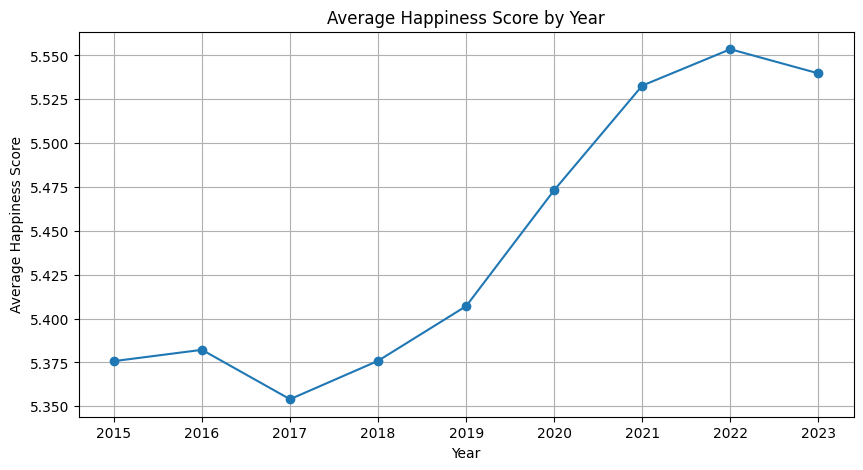

In [8]:
import matplotlib.pyplot as plt

average_happiness_per_year = combined_df.groupby('year')['happiness_score'].mean().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(average_happiness_per_year.index, average_happiness_per_year.values, marker='o')
plt.title('Average Happiness Score by Year')
plt.xlabel('Year')
plt.ylabel('Average Happiness Score')
plt.grid(True)
plt.show()

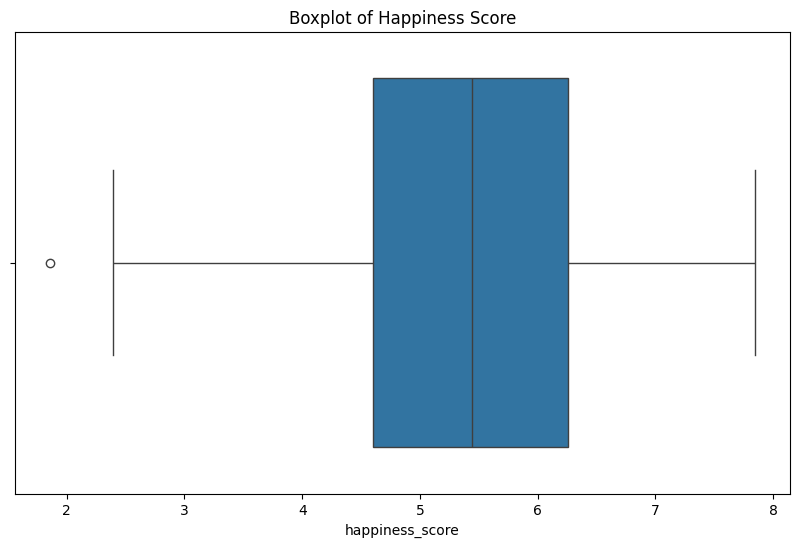

In [9]:
import seaborn as sns

# Create a box plot for Happiness Score
plt.figure(figsize=(10, 6))
sns.boxplot(x=combined_df['happiness_score'])
plt.title('Boxplot of Happiness Score')
plt.xlabel('happiness_score')
plt.show()

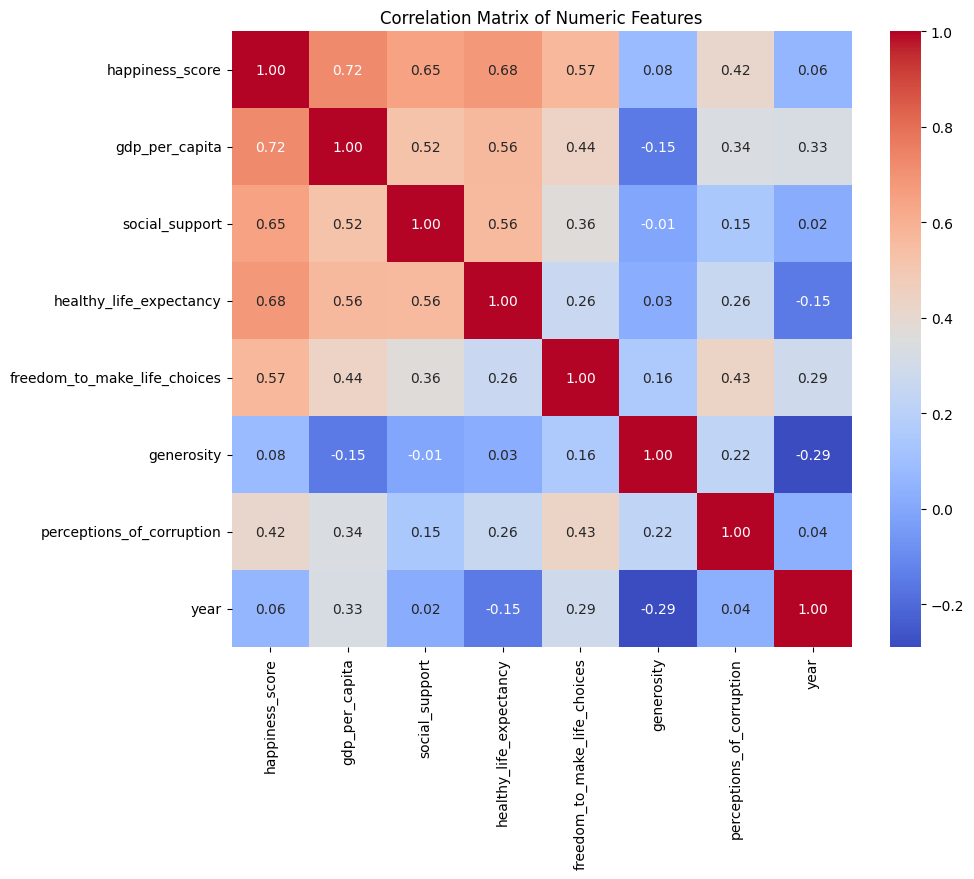

In [10]:
# Ensure only numeric columns are selected
numeric_cols = combined_df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

In [11]:
combined_df.columns = combined_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace(r'[^\w\s]', '', regex=True)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = combined_df[['gdp_per_capita', 'social_support', 'healthy_life_expectancy', 'freedom_to_make_life_choices', 'generosity', 
                        'perceptions_of_corruption']]
target = combined_df['happiness_score']

# Handle any missing values
features = features.dropna()
target = target[features.index]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Check the split size
print(f'Training set: {X_train.shape}, Test set: {X_test.shape}')

Training set: (1092, 6), Test set: (273, 6)


In [13]:
# Initialize the model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the results
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.3459600873090773
R-squared: 0.7501001230328915


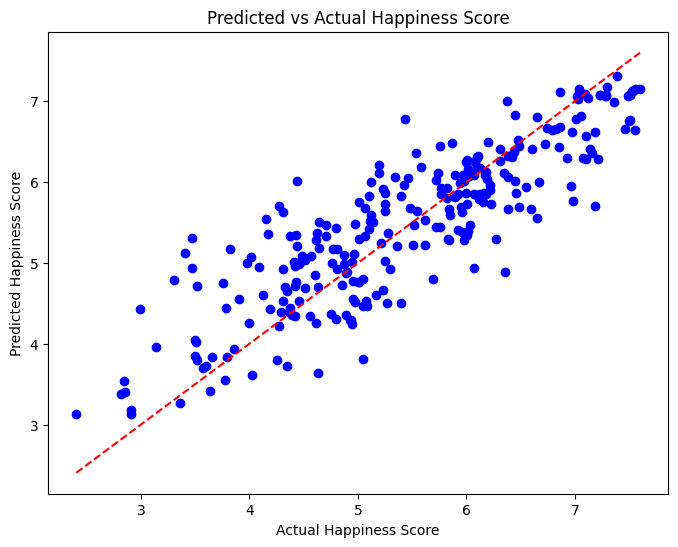

In [14]:
# Scatter plot of predictions vs actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Happiness Score')
plt.ylabel('Predicted Happiness Score')
plt.title('Predicted vs Actual Happiness Score')
plt.show()

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest - MSE: {rf_mse:.2f}")
print(f"Random Forest - R² Score: {rf_r2:.2f}")

Random Forest - MSE: 0.28
Random Forest - R² Score: 0.80
